In [18]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Initialize Knapsack fitness function
problem_length=200
'''
import random
weights =[random.randint(5,10) for i in range(problem_length)] 
values = [i for i in range(1,problem_length+1)]
max_weight_pct = 0.6
fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct)
'''
import random
weights = [random.randint(1,30) for i in range(problem_length)]
values = [random.randint(1,20) for i in range(problem_length)]
max_weight_pct = 0.30
fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct)
# Define optimization problem object
problem = mlrose_hiive.DiscreteOpt(length =problem_length, fitness_fn= fitness, maximize=True, max_val=2)

# Define decay schedule for simuladed annealing
schedule = mlrose_hiive.ExpDecay()

import time
# Solve using randomized Hill-Climbing   
startTime = time.time()
best_state_rhl, best_fitness_rhl, fitness_curve_rhl = mlrose_hiive.random_hill_climb(problem, max_attempts = 1000, 
                                                      max_iters = 1000, curve= True,
                                                      random_state = 42)
executionTime = (time.time() - startTime)
print('The best state found is: ', best_state_rhl)
print('The fitness at the best state is: ', best_fitness_rhl)
print('Execution time in seconds: ' + str(executionTime))
#print('The fitness curve is: ', fitness_curve_rhl)


# Solve using Simulated Annealing
startTime = time.time()
best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 1000, 
                                                      max_iters = 1000, curve= True,
                                                      random_state = 42)

executionTime = (time.time() - startTime)
print('The best state found is: ', best_state_sa)
print('The fitness at the best state is: ', best_fitness_sa)
print('Execution time in seconds: ' + str(executionTime))
#print('The fitness curve is: ', fitness_curve_sa)


# Solve using Genetic Algorithm
startTime = time.time()
best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts = 50, 
                                                      max_iters = 50, curve= True,
                                                      random_state = 42)

executionTime = (time.time() - startTime)
print('The best state found is: ', best_state_ga)
print('The fitness at the best state is: ', best_fitness_ga)
print('Execution time in seconds: ' + str(executionTime))
#print('The fitness curve is: ', fitness_curve_ga)

# Solve using MIMIC
startTime = time.time()
best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts = 300, 
                                                      max_iters = 4000, curve= True,
                                                      random_state = 42)

executionTime = (time.time() - startTime)
print('The best state found is: ', best_state_mimic)
print('The fitness at the best state is: ', best_fitness_mimic)
print('Execution time in seconds: ' + str(executionTime))
#print('The fitness curve is: ', fitness_curve_mimic)

The best state found is:  [0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0]
The fitness at the best state is:  0.0
Execution time in seconds: 0.04100847244262695
The best state found is:  [1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1
 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1
 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0
 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1
 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1]
The fitness at the best state is:  0.0
Execution

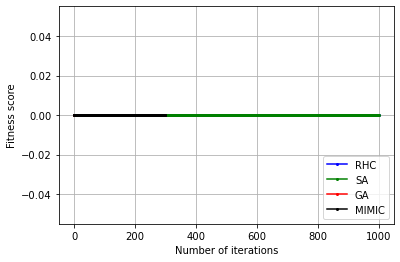

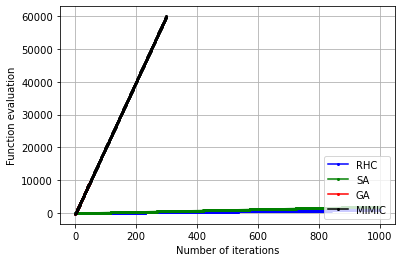

In [20]:
n=np.arange(0,1000)
plt.plot(n, fitness_curve_rhl[:,0],marker='o', markersize=2,color='blue', label='RHC')
plt.plot(n, fitness_curve_sa[:,0],marker='o', markersize=2,color='green', label='SA')
plt.plot(np.arange(0,50), fitness_curve_ga[:,0],marker='o', markersize=2,color='red', label='GA')
plt.plot(np.arange(0,len(fitness_curve_mimic[:,1])), fitness_curve_mimic[:,0],marker='o', markersize=2,color='black', label='MIMIC')
plt.xlabel('Number of iterations')
plt.ylabel('Fitness score')
plt.legend(loc='lower right')
plt.grid()
plt.show()


n=np.arange(0,1000)
plt.plot(n, fitness_curve_rhl[:,1]-fitness_curve_rhl[1,1],marker='o', markersize=2,color='blue', label='RHC')
plt.plot(n, fitness_curve_sa[:,1]-fitness_curve_sa[1,1],marker='o', markersize=2,color='green', label='SA')
plt.plot(np.arange(0,len(fitness_curve_ga[:,1])), fitness_curve_ga[:,1]-fitness_curve_ga[1,1],marker='o', markersize=2,color='red', label='GA')
plt.plot(np.arange(0,len(fitness_curve_mimic[:,1])), fitness_curve_mimic[:,1]-fitness_curve_mimic[1,1],marker='o', markersize=2,color='black', label='MIMIC')
plt.xlabel('Number of iterations')
plt.ylabel('Function evaluation')
plt.legend(loc='lower right')
plt.grid()
plt.show()
